# <b>Assignment : DT</b>

<font color='red'><b> Please check below video before attempting this assignment</b></font>

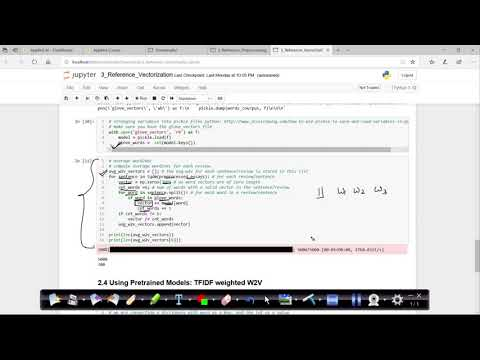

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('ZhLXULFjIjQ', width="1000",height="500")

In [1]:
import gdown

In [2]:
!gdown --id 168O6mwDl3mhw-qODQjmQjn4OPgY2rMY9

!gdown --id 1ozkCL9SfzYw9-BAWb4UFzV_stN8tJsdm

Downloading...
From: https://drive.google.com/uc?id=168O6mwDl3mhw-qODQjmQjn4OPgY2rMY9
To: /content/preprocessed_data.csv
100% 124M/124M [00:02<00:00, 54.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ozkCL9SfzYw9-BAWb4UFzV_stN8tJsdm
To: /content/glove_vectors
100% 128M/128M [00:01<00:00, 74.8MB/s]


In [3]:
!pip3 install chart_studio

     |████████████████████████████████| 64 kB 1.9 MB/s 


<font color='red'><b> TF-IDFW2V</b></font>

<b>Tfidf w2v (w1,w2..) = (tfidf(w1) * w2v(w1) + tfidf(w2) * w2v(w2) + …)  /    (tfidf(w1) + tfidf(w2) + …)</b>

<b>(Optional) Please check course video on [AVgw2V and TF-IDFW2V ](https://www.appliedaicourse.com/lecture/11/applied-machine-learning-online-course/2916/avg-word2vec-tf-idf-weighted-word2vec/3/module-3-foundations-of-natural-language-processing-and-machine-learning)for more details.

<font color='blue'><b>Glove vectors </b></font>

In [4]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
nltk.downloader.download('vader_lexicon')
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os
import chart_studio.plotly as py

import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

from scipy.sparse import hstack
#from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


<b>In this assignment you will be working with glove vectors , please check  [this](https://en.wikipedia.org/wiki/GloVe_(machine_learning)) and [this](https://en.wikipedia.org/wiki/GloVe_(machine_learning)) for more details.</b><br>

Download glove vectors from this [link ](https://drive.google.com/file/d/1lDca_ge-GYO0iQ6_XDLWePQFMdAA2b8f/view?usp=sharing)

In [5]:
#please use below code to load glove vectors 
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

or else , you can use below code

In [6]:

"""# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')"""

"""# ============================
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================"""

"""words = []
for i in preproced_texts:
    words.extend(i.split(' '))

for i in preproced_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)
"""


'words = []\nfor i in preproced_texts:\n    words.extend(i.split(\' \'))\n\nfor i in preproced_titles:\n    words.extend(i.split(\' \'))\nprint("all the words in the coupus", len(words))\nwords = set(words)\nprint("the unique words in the coupus", len(words))\n\ninter_words = set(model.keys()).intersection(words)\nprint("The number of words that are present in both glove vectors and our coupus",       len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")\n\nwords_courpus = {}\nwords_glove = set(model.keys())\nfor i in words:\n    if i in words_glove:\n        words_courpus[i] = model[i]\nprint("word 2 vec length", len(words_courpus))\n\n\n# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/\n\nimport pickle\nwith open(\'glove_vectors\', \'wb\') as f:\n    pickle.dump(words_courpus, f)\n'

# <font color='red'> <b>Task - 1</b></font>

<ol>
    <li><strong>Apply Decision Tree Classifier(DecisionTreeClassifier) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features +  preprocessed_essay (TFIDF) + Sentiment scores(preprocessed_essay)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features +  preprocessed_essay (TFIDF W2V) + Sentiment scores(preprocessed_essay)</li>        </ul>
    </li>
    <li><strong>The hyper paramter tuning (best `depth` in range [1, 3, 10, 30], and the best `min_samples_split` in range [5, 10, 100, 500])</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation(use gridsearch cv or randomsearch cv)/simple cross validation data(you can write your own for loops refer sample solution)</li>
        </ul>
    </li>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/Gp2DQmh.jpg' width=500px> with X-axis as <strong>min_sample_split</strong>, Y-axis as <strong>max_depth</strong>, and Z-axis as <strong>AUC Score</strong> , we have given the notebook which explains how to plot this 3d plot, you can find it in the same drive <i>3d_scatter_plot.ipynb</i></li>
            <p style="text-align:center;font-size:30px;color:red;"><strong>or</strong></p> <br>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/fgN9aUP.jpg' width=300px> <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heat maps</a> with rows as <strong>min_sample_split</strong>, columns as <strong>max_depth</strong>, and values inside the cell representing <strong>AUC Score</strong> </li>
    <li>You choose either of the plotting techniques out of 3d plot or heat map</li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
        Make sure that you are using predict_proba method to calculate AUC curves, because AUC is calcualted on class probabilities and not on class labels.
    <img src='https://i.imgur.com/wMQDTFe.jpg' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='https://i.imgur.com/IdN5Ctv.png' width=300px></li>
    <li>Once after you plot the confusion matrix with the test data, get all the `false positive data points`
        <ul>
            <li> Plot the WordCloud(https://www.geeksforgeeks.org/generating-word-cloud-python/) with the words of essay text of these `false positive data points`</li>
            <li> Plot the box plot with the `price` of these `false positive data points`</li>
            <li> Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`</li>
        </ul>
        </ul>
    </li>
   

In [7]:
pd.set_option('display.max_columns', None)

In [8]:
"""
Categorical features are:
school_state
teacher_prefix
project_grade_category
I will use CountVectorizer(binary=True)
"""

"""
numerical:
teacher_number_of_previously_posted_projects
price
I will keep them as they are
"""

"""
text: 
essay
clean_categories
clean_subcategories
I will apply TFIDF on them
"""
"""
target variable:
project_is_approved
 """


'\ntarget variable:\nproject_is_approved\n '

In [9]:
"""
Categorical features are:
school_state
teacher_prefix
project_grade_category
I will use CountVectorizer(binary=True)
"""



'\nCategorical features are:\nschool_state\nteacher_prefix\nproject_grade_category\nI will use CountVectorizer(binary=True)\n'

# <font color='red'><b> Task - 2 </b></font>

For this task consider **set-1** features.

*  Select all the features which are having non-zero feature importance.You can get the feature importance using  'feature_importances_` 
   (https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), discard the all other remaining features and then apply any of the model of you choice i.e. (Dession tree, Logistic Regression, Linear SVM).
*  You need to do hyperparameter tuning corresponding to the model you selected and procedure in step 2 and step 3<br>
  **Note**: when you want to find the feature importance make sure you don't use max_depth parameter keep it None.
  </li>
    <br>
You need to summarize the results at the end of the notebook, summarize it in the table format
        <img src='http://i.imgur.com/YVpIGGE.jpg' width=400px>
    </li>
</ol>

<font color='blue'><b>Hint for calculating Sentiment scores</b></font>

In [10]:
# import nltk
# nltk.download('vader_lexicon')

In [11]:

"""
sample_sentence_1='I am happy.'
ss_1 = sid.polarity_scores(sample_sentence_1)
print('sentiment score for sentence 1',ss_1)

sample_sentence_2='I am sad.'
ss_2 = sid.polarity_scores(sample_sentence_2)
print('sentiment score for sentence 2',ss_2)

sample_sentence_3='I am going to New Delhi tommorow.'
ss_3 = sid.polarity_scores(sample_sentence_3)
print('sentiment score for sentence 3',ss_3)
print(ss_1.values())
print(ss_2.values())
print(ss_3.values())"""

"\nsample_sentence_1='I am happy.'\nss_1 = sid.polarity_scores(sample_sentence_1)\nprint('sentiment score for sentence 1',ss_1)\n\nsample_sentence_2='I am sad.'\nss_2 = sid.polarity_scores(sample_sentence_2)\nprint('sentiment score for sentence 2',ss_2)\n\nsample_sentence_3='I am going to New Delhi tommorow.'\nss_3 = sid.polarity_scores(sample_sentence_3)\nprint('sentiment score for sentence 3',ss_3)\nprint(ss_1.values())\nprint(ss_2.values())\nprint(ss_3.values())"

<h1> Decision Tree </h1>

# <font color='red'> <b>Task - 1</b></font>

## 1.1 Loading Data

In [12]:
#make sure you are loading atleast 50k datapoints
#you can work with features of preprocessed_data.csv for the assignment.
import pandas as pd
data = pd.read_csv('preprocessed_data.csv', nrows = 100000)

In [13]:
all_essay = data['essay']

In [14]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# import nltk
# nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

senti_mat_essay = all_essay.apply(lambda x: np.array(list(sid.polarity_scores(x).values())))


In [15]:
senti_mat_essay_list = []

for i in senti_mat_essay.values:
  senti_mat_essay_list.append(i)

senti_mat_essay_list = np.array(senti_mat_essay_list)
senti_mat_essay_list.shape

(100000, 4)

In [16]:
df_senti = pd.DataFrame(data = senti_mat_essay_list, columns=['neg','neu','pos','compound'])
df_senti.shape

(100000, 4)

In [17]:
df_senti.head()

neg    neu    pos  compound
0  0.013  0.783  0.205    0.9867
1  0.072  0.680  0.248    0.9897
2  0.017  0.721  0.262    0.9860
3  0.030  0.783  0.187    0.9524
4  0.029  0.683  0.288    0.9873

In [18]:
data_with_senti = pd.concat([data , df_senti], axis = 1)
data_with_senti.head()

school_state teacher_prefix project_grade_category  \
0           ca            mrs          grades_prek_2   
1           ut             ms             grades_3_5   
2           ca            mrs          grades_prek_2   
3           ga            mrs          grades_prek_2   
4           wa            mrs             grades_3_5   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                            53                    1   
1                                             4                    1   
2                                            10                    1   
3                                             2                    1   
4                                             2                    1   

    clean_categories                 clean_subcategories  \
0       math_science  appliedsciences health_lifescience   
1       specialneeds                        specialneeds   
2  literacy_language                            literacy   
3    appliedlearning                    earlydevelopment   
4  literacy_language                            literacy   

                                               essay   price    neg    neu  \
0  i fortunate enough use fairy tale stem kits cl...  725.05  0.013  0.783   
1  imagine 8 9 years old you third grade classroo...  213.03  0.072  0.680   
2  having class 24 students comes diverse learner...  329.00  0.017  0.721   
3  i recently read article giving students choice...  481.04  0.030  0.783   
4  my students crave challenge eat obstacles brea...   17.74  0.029  0.683   

     pos  compound  
0  0.205    0.9867  
1  0.248    0.9897  
2  0.262    0.9860  
3  0.187    0.9524  
4  0.288    0.9873

In [19]:
# write your code in following steps for task 1
# 1. calculate sentiment scores for the essay feature 
# 2. Split your data.
# 3. perform tfidf vectorization of text data.
# 4. perform tfidf w2v vectorization of text data.
# 5. perform encoding of categorical features.
# 6. perform encoding of numerical features
# 7. For task 1 set 1 stack up all the features
# 8. For task 1 set 2 stack up all the features (for stacking dense features you can use np.stack)
# 9. Perform hyperparameter tuning and plot either heatmap or 3d plot.
# 10. Find the best parameters and fit the model. Plot ROC-AUC curve(using predict proba method)
# 11. Plot confusion matrix based on best threshold value
# 12. Find all the false positive data points and plot wordcloud of essay text and pdf of teacher_number_of_previously_posted_projects.
# 13. Write your observations about the wordcloud and pdf.

In [20]:

y = data_with_senti['project_is_approved']
X = data_with_senti.drop('project_is_approved',axis=1)

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
#splitting data into train, cv, test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [23]:
X_train.shape, X_cv.shape

((60000, 12), (20000, 12))

In [24]:
"""
Categorical features are:
school_state
teacher_prefix
project_grade_category
I will use CountVectorizer(binary=True)
"""

ss_vect = CountVectorizer(binary=True)

ss_vect = ss_vect.fit(X_train['school_state'])
train_ss = ss_vect.transform(X_train['school_state'])

#preparing cv_data alongside
cv_ss = ss_vect.transform(X_cv['school_state'])

test_ss = ss_vect.transform(X_test['school_state']) #preparing test_data for future

teach_pref_vect = CountVectorizer(binary=True)
teach_pref_vect  = teach_pref_vect.fit(X_train['teacher_prefix'])
train_teacher_pref = teach_pref_vect.transform(X_train['teacher_prefix'])

#preparing cv_data alongside
cv_teacher_pref = teach_pref_vect.transform(X_cv['teacher_prefix'])

test_teacher_pref = teach_pref_vect.transform(X_test['teacher_prefix']) #preparing test_data for future

project_grade_vect = CountVectorizer(binary=True)
project_grade_vect  = project_grade_vect.fit(X_train['project_grade_category'])
train_project_grade= project_grade_vect.transform(X_train['project_grade_category'])

#preparing cv_data alongside
cv_project_grade = project_grade_vect.transform(X_cv['project_grade_category'])

test_project_grade = project_grade_vect.transform(X_test['project_grade_category'])

#all these categorical features are one-hot encoded
#all these vect objects will be used later to transform data in cv dataset and test dataset

In [25]:
#let's deal with text data
"""
text: 
essay
clean_categories #title
clean_subcategories #sub-title
I will apply TFIDF on them
"""
essay_vect = TfidfVectorizer(min_df = 10)
essay_vect = essay_vect.fit(X_train['essay'])

dict_train = dict(zip( essay_vect.get_feature_names(), list(essay_vect.idf_) )) #this dict_train will be used to process both X_train and X_cv
train_tfidf_words = set(essay_vect.get_feature_names()) #the words will be used for X_train and X_cv as well

train_essay = essay_vect.transform(X_train['essay'])


cv_essay =  essay_vect.transform(X_cv['essay']) #transforming cv essays too

test_essay =  essay_vect.transform(X_test['essay']) #transforming test essays too

#well, I am not sure about the logic of using TfidfVectorizer for titles and subtitles. The motto of tfidf is "the rare word in whole corpus and frequent word in a document is important"
#The idea makes sense in essays , reviews.
#the structure of titles are basically two to three words , containing title. Are we sure that the rarity of a word among all documents is of distinct importance?

title_vect = TfidfVectorizer()#here min_df =10 didn't seem useful, as the each document has a title, i.e each document is very brief.
# So, already the word present there holds some importance, and I didn't want to ignore them by placing a threshold
title_vect = title_vect.fit(X_train['clean_categories'])
train_title = title_vect.transform(X_train['clean_categories'])

cv_title = title_vect.transform(X_cv['clean_categories']) #transforming cv titles too

test_title = title_vect.transform(X_test['clean_categories']) #transforming test data titles too

subtitle_vect = TfidfVectorizer()#here min_df =10 didn't seem useful, as the each document has a title, i.e each document is very brief.
# So, already the word present there holds some importance, and I didn't want to ignore them by placing a threshold
subtitle_vect = subtitle_vect.fit(X_train['clean_subcategories'])
train_subtitle = subtitle_vect.transform(X_train['clean_subcategories'])

cv_subtitle = subtitle_vect.transform(X_cv['clean_subcategories']) #transforming cv subtitles too
test_subtitle = subtitle_vect.transform(X_test['clean_subcategories']) #transforming cv subtitles too


In [26]:
#tfidf_weigghted w2v
def tfidf_wtd_w2v_vectors(content):
  tfidf_w2v_vectors = []

  for sentence in tqdm(content): 
    vector = np.zeros(300)
    tf_idf_wt = 0
    for word in sentence.split():
      if (word in glove_words) and (word in train_tfidf_words): #note the use of train_tfidf_words. That is we hope that training data is enough representation for whole population and any dat ain cv or test needs to be transformed or chacked based on train data
        vec = model[word]
        tf_idf = dict_train[word]*( sentence.count(word)/len(sentence.split()) ) #note the use of dict_train. That is we hope that training data is enough representation for whole population and any dat ain cv or test needs to be transformed or chacked based on train data
        vector = vector + ( vec*tf_idf )
        tf_idf_wt += tf_idf
    if tf_idf_wt != 0:
      vector = vector/tf_idf_wt
    tfidf_w2v_vectors.append(vector)

  return tfidf_w2v_vectors

In [27]:
train_tfidf_w2v_essay = tfidf_wtd_w2v_vectors(X_train['essay'])
cv_tfidf_w2v_essay = tfidf_wtd_w2v_vectors(X_cv['essay'])

test_tfidf_w2v_essay = tfidf_wtd_w2v_vectors(X_test['essay'])

100%|██████████| 20000/20000 [00:41<00:00, 485.27it/s]


In [28]:
#Now, let's deal with  numeric data
"""
numerical:
teacher_number_of_previously_posted_projects
price
I will keep them as they are
"""
train_num_of_prevpostproj_teacher = X_train["teacher_number_of_previously_posted_projects"].values
cv_num_of_prevpostproj_teacher = X_cv["teacher_number_of_previously_posted_projects"].values
test_num_of_prevpostproj_teacher = X_test["teacher_number_of_previously_posted_projects"].values

train_price = X_train["price"].values
cv_price = X_cv["price"].values
test_price = X_test["price"].values

In [29]:
train_essay_senti = X_train[['neg','neu','pos','compound']].values
cv_essay_senti = X_cv[['neg','neu','pos','compound']].values

test_essay_senti = X_test[['neg','neu','pos','compound']].values

In [30]:
[j.shape for j in [train_project_grade ,train_teacher_pref ,train_ss, train_title,train_subtitle,train_num_of_prevpostproj_teacher,train_price,train_essay_senti ]]

[(60000, 4),
 (60000, 5),
 (60000, 51),
 (60000, 9),
 (60000, 30),
 (60000,),
 (60000,),
 (60000, 4)]

In [31]:
#train_price.reshape(-1,1) : this was very important as it wasn't originally in 2d form and i was trying to stack it with another 2d matrix
#Why have I made two stacks? The firs stack (scipy.sparse.hstack) helps to tack sparse matrices
#the second stack(numpy.hstack) helps to stack numpy dense matrices.
#note : to come to such an analysis as discussed above. simple code can be though of :
####[j.shape for j in [train_project_grade ,train_teacher_pref ,train_ss, train_title,train_subtitle,train_num_of_prevpostproj_teacher,train_price,train_essay_senti ]]
####[type(j) for j in [train_project_grade ,train_teacher_pref ,train_ss, train_title,train_subtitle,train_num_of_prevpostproj_teacher,train_price,train_essay_senti ]]

m_set1=hstack((train_project_grade ,train_teacher_pref ,train_ss, train_title,train_subtitle,train_essay))
n_set1=np.hstack((train_num_of_prevpostproj_teacher.reshape(-1,1),train_price.reshape(-1,1),train_essay_senti))
train_data_set1=hstack((m_set1,n_set1))

In [32]:
m_cv_set1=hstack((cv_project_grade ,cv_teacher_pref ,cv_ss, cv_title,cv_subtitle, cv_essay))
n_cv_set1=np.hstack((cv_num_of_prevpostproj_teacher.reshape(-1,1),cv_price.reshape(-1,1),cv_essay_senti))
cv_data_set1=hstack((m_cv_set1,n_cv_set1))

In [33]:
m_test_set1=hstack((test_project_grade ,test_teacher_pref ,test_ss, test_title,test_subtitle, test_essay))
n_test_set1=np.hstack((test_num_of_prevpostproj_teacher.reshape(-1,1),test_price.reshape(-1,1),test_essay_senti))
test_data_set1=hstack((m_test_set1,n_test_set1))

In [34]:
tree = DecisionTreeClassifier() #The hyper paramter tuning (best `depth` in range [1, 3, 10, 30], and the best `min_samples_split` in range [5, 10, 100, 500])
tree.fit(train_data_set1,y_train)

DecisionTreeClassifier()

In [35]:
np.abs(tree.predict(train_data_set1) - y_train.values).sum()/len(y_train.values) #set 1 done

1.6666666666666667e-05

In [36]:
np.abs(tree.predict(cv_data_set1) - y_cv.values).sum()/len(y_cv.values)#set 1 done

0.2405

In [37]:
m_train_set2 = hstack((train_project_grade ,train_teacher_pref ,train_ss, train_title,train_subtitle,train_tfidf_w2v_essay)) #I have replaced  train_essay(tfidf reprn. of essay) with train_tfidf_w2v_essay(w2v reprn. of essay )
n_train_set2 =np.hstack((train_num_of_prevpostproj_teacher.reshape(-1,1),train_price.reshape(-1,1),train_essay_senti))
train_data_set2=hstack((m_train_set2,n_train_set2))

m_cv_set2=hstack((cv_project_grade ,cv_teacher_pref ,cv_ss, cv_title,cv_subtitle, cv_tfidf_w2v_essay))
n_cv_set2=np.hstack((cv_num_of_prevpostproj_teacher.reshape(-1,1),cv_price.reshape(-1,1),cv_essay_senti))
cv_data_set2=hstack((m_cv_set2,n_cv_set2))

m_test_set2=hstack((test_project_grade ,test_teacher_pref ,test_ss, test_title,test_subtitle, test_tfidf_w2v_essay))
n_test_set2=np.hstack((test_num_of_prevpostproj_teacher.reshape(-1,1),test_price.reshape(-1,1),test_essay_senti))
test_data_set2=hstack((m_test_set2,n_test_set2))

In [38]:
tree_for_set2 = DecisionTreeClassifier() #The hyper paramter tuning (best `depth` in range [1, 3, 10, 30], and the best `min_samples_split` in range [5, 10, 100, 500])
tree_for_set2.fit(train_data_set2, y_train.values)

DecisionTreeClassifier()

In [39]:
pred_set2_train = tree_for_set2.predict_proba(train_data_set2) 
train_truth = y_train.values
#np.abs(tree_for_set2.predict(train_data_set2) - y_train.values).sum()/len(y_train.values) #set 2 done

In [40]:
np.abs(tree_for_set2.predict(cv_data_set2) - y_cv.values).sum()/len(y_cv.values)#set2 done

0.25885

Task 1 is done 

In [41]:
train_num_of_prevpostproj_teacher.reshape(-1,1).shape

(60000, 1)

In [42]:
[j.shape for j in [train_project_grade ,train_teacher_pref ,train_ss, train_title,train_subtitle,train_num_of_prevpostproj_teacher,train_price,train_essay_senti ]]

[(60000, 4),
 (60000, 5),
 (60000, 51),
 (60000, 9),
 (60000, 30),
 (60000,),
 (60000,),
 (60000, 4)]

In [43]:
#v=np.hstack((train_price,train_essay_senti))
train_price.shape , train_essay_senti.shape

((60000,), (60000, 4))

In [44]:
train_project_grade.shape ,train_teacher_pref.shape ,train_ss.shape, train_title.shape, train_subtitle.shape,train_num_of_prevpostproj_teacher.shape,train_price.shape, train_essay,train_essay_senti.shape

((60000, 4),
 (60000, 5),
 (60000, 51),
 (60000, 9),
 (60000, 30),
 (60000,),
 (60000,),
 <60000x13185 sparse matrix of type '<class 'numpy.float64'>'
 	with 6407198 stored elements in Compressed Sparse Row format>,
 (60000, 4))

In [45]:
from sklearn.metrics import roc_auc_score , roc_curve 
#I was doing a mistake : for fpr , tpr : you only need predicted labels
#but remember the process of auc_roc : for this you need predic_proba. Why? 
#I am doing simple cross-validation process. Will do k-fold later
#The hyper paramter tuning (best `depth` in range [1, 3, 10, 30], and the best `min_samples_split` in range [5, 10, 100, 500])

def cross_valid(training_x, training_y, cvalid_x, cvalid_y):
  auc_train = []
  auc_cv = []
  for dep in [1,3,10,30]: #dep=> for "max_depth"
    for splt in [5,10,100,500]: #splt => for "min_samples_split"
      tree = DecisionTreeClassifier(min_samples_split= splt, max_depth= dep )

      tree.fit(training_x, training_y)
      pred_train=tree.predict_proba(training_x)
      pred_cv=tree.predict_proba(cvalid_x)
      roc_auc_train = roc_auc_score(training_y , pred_train[:,1])
      roc_auc_cv = roc_auc_score(cvalid_y , pred_cv[:,1])
      #print(roc_auc_train)
      #print(roc_auc_cv)
      auc_train.append(roc_auc_train)
      auc_cv.append(roc_auc_cv)
   

  return auc_train , auc_cv




In [46]:
#using set1 parameters for hyperparam-tuning
train_auc, cv_auc = cross_valid(train_data_set1, y_train.values, cv_data_set1, y_cv.values)

In [47]:
train_auc_matform = np.array(train_auc).reshape(4,-1)
cv_auc_matform = np.array(cv_auc).reshape(4,-1)

In [48]:
np.abs(train_auc_matform - cv_auc_matform)

array([[0.00037569, 0.00037569, 0.00037569, 0.00037569],
       [0.00453964, 0.00453964, 0.00453964, 0.00453964],
       [0.07249626, 0.0698634 , 0.05813408, 0.04623502],
       [0.29844754, 0.28808246, 0.22961875, 0.15382747]])

In [49]:
train_auc_matform , cv_auc_matform

(array([[0.55182846, 0.55182846, 0.55182846, 0.55182846],
        [0.6076848 , 0.6076848 , 0.6076848 , 0.6076848 ],
        [0.70543419, 0.7036512 , 0.69894607, 0.69215618],
        [0.8651956 , 0.85966502, 0.82897762, 0.79135618]]),
 array([[0.55145277, 0.55145277, 0.55145277, 0.55145277],
        [0.60314515, 0.60314515, 0.60314515, 0.60314515],
        [0.63293794, 0.63378779, 0.64081199, 0.64592117],
        [0.56674807, 0.57158256, 0.59935887, 0.63752871]]))

In [50]:
#https://stackoverflow.com/questions/41164710/how-to-add-text-plus-value-in-python-seaborn-heatmap

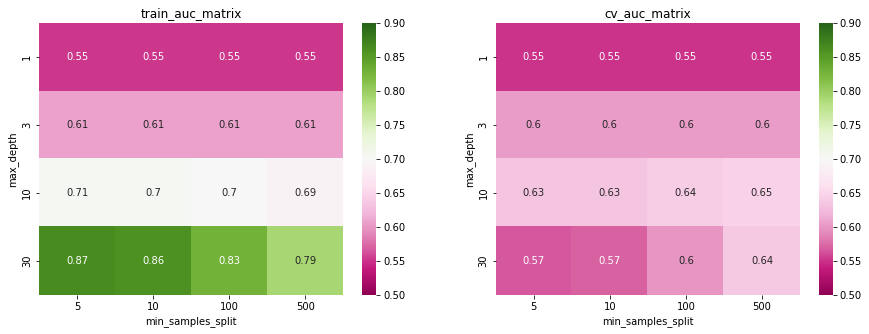

In [51]:
#BlockName: HMAPS
import seaborn as sns
fig, (ax1, ax2) = plt.subplots(nrows=1,ncols=2,figsize=(15,5))
sns.heatmap(train_auc_matform , xticklabels=[5,10,100,500], yticklabels= [1,3,10,30],vmin=0.5 , vmax= 0.9 ,ax =ax1, annot =True ,cmap="PiYG") #yaxis: max_depth, #x_axis: min_samples_split
sns.heatmap(cv_auc_matform , xticklabels=[5,10,100,500], yticklabels= [1,3,10,30] ,vmin=0.5, vmax=0.9 ,ax=ax2 ,annot =True , cmap="PiYG") #yaxis: max_depth, #x_axis: min_samples_split
ax1.set(title="train_auc_matrix",xlabel="min_samples_split" , ylabel= "max_depth")
ax2.set(title="cv_auc_matrix",xlabel="min_samples_split" , ylabel= "max_depth")
plt.show()

In [52]:
cv_auc_mag_and_diff_bw_cv_and_train= 0.6*cv_auc_matform + 0.4*np.abs(train_auc_matform -cv_auc_matform )

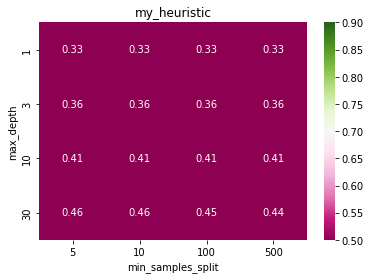

In [53]:
# use of plt.axes() : https://stackoverflow.com/questions/32723798/how-do-i-add-a-title-and-axis-labels-to-seaborn-heatmap
ax = plt.axes()
sns.heatmap(cv_auc_mag_and_diff_bw_cv_and_train , xticklabels=[5,10,100,500], yticklabels= [1,3,10,30] ,vmin=0.5, vmax=0.9 ,annot =True , cmap="PiYG" ,ax= ax) #yaxis: max_depth, #x_axis: min_samples_split
ax.set(title="my_heuristic",xlabel="min_samples_split" , ylabel= "max_depth")
plt.show()

In [54]:
#Analysis of two heatmaps in blcock, named HMAPS
#I see that min_samples_split doesnot seem to affect auc score much
#Genral rule of thumb: 
#max_depth should not be very high or you can overfit [too much flexibility of training data. Many conditions down the tree which satisfy well to split and categorise the training data well]
#min_samples_split should not be very low , or you can overfit [In classification task, min_samples_split means less number of voters in a leaf to decide split]

#Firstly, I choose to focus solely on the second heatmap.
 # I notice that max_depth increment from 10 to 30 , lowers the cv_auc_score. What about max_depth = 1 and 3? The general trend is that max_depth upto 10 has supported the cv_auc_score to grow
 ##Now, for max_depth = 10, I notice corresponding train_auc_scores. They are all about same equal to 0.7
 ##Also, for max_depth = 30, I notice that our tree might be overfitting , especially for min_samples_split =5 and 10
 ##So, let us take max_depth =10 . Now, what value of min_samples_split should we take?
 ##For max_depth =30, both the scores don't seem varying. Here, going with rule of thumb, I discard min_samples_split = 5 and 10.
 ###########Now, the question is should I take min_samples_split = 100 or 500?
 ########### I will take min_samples_split = 100 . Why not 500?
 ########### For max_depth = 10. The leaves of such a tree will be 512 in numbers
 ########### If we assume that all these 512 leaves have equal numbe of points. So, if there are 50000 points. It is roughly about 50000/500 = 100
 ########### Basically, the above discussion is not rigorous , but I justified my choice of min_samples_split = 100 thinking in similar sense


In [55]:
best_max_depth= 10
best_min_samples_split = 100
tree_of_best_hyp = DecisionTreeClassifier(min_samples_split= best_min_samples_split, max_depth= best_max_depth )
tree_of_best_hyp.fit(train_data_set1, y_train.values)

DecisionTreeClassifier(max_depth=10, min_samples_split=100)

In [56]:
prob_predictions_train = tree_of_best_hyp.predict_proba(train_data_set1)
roc_auc_on_train = roc_auc_score(y_train.values , prob_predictions_train [:,1])
fpr_train, tpr_train, _ = roc_curve(y_train.values , prob_predictions_train [:,1])

prob_predictions_test = tree_of_best_hyp.predict_proba(test_data_set1)
roc_auc_on_test = roc_auc_score(y_test.values , prob_predictions_test [:,1])
fpr_test, tpr_test, _ = roc_curve(y_test.values , prob_predictions_test [:,1])
predictions_test= tree_of_best_hyp.predict(test_data_set1)

prob_predictions_cv = tree_of_best_hyp.predict_proba(cv_data_set1)
roc_auc_on_cv = roc_auc_score(y_cv.values , prob_predictions_cv [:,1])
fpr_cv, tpr_cv, _ = roc_curve(y_cv.values , prob_predictions_cv [:,1])
predictions_cv= tree_of_best_hyp.predict(cv_data_set1)

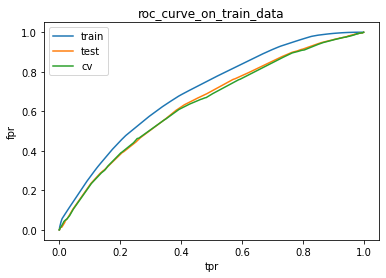

ROC on train data: 0.6986667473717455
ROC on test data: 0.6458723503372059


In [57]:
plt.plot(fpr_train, tpr_train ,label="train")
plt.plot(fpr_test, tpr_test, label="test")
plt.plot(fpr_cv, tpr_cv, label="cv")
plt.xlabel("tpr")
plt.ylabel("fpr")
plt.title("roc_curves on set1")
plt.legend()
plt.show()
print("ROC on train data:",roc_auc_on_train)
print("ROC on test data:",roc_auc_on_test)

In [58]:
def custom_confusion_matrix(truths, preds, n_classes = 2):
  array = np.zeros((n_classes,n_classes))
  #[(0,0):'tn',(0,1):'fn', (1,0) : 'fp', (1,1):'tp']
  k = preds + truths
  p = preds - truths
  tn = len(k[k==0])
  fn = len(p[p==-1])
  fp = len(p[p==1])
  tp = len(k[k==2])
  print(tn+fn+fp+tp)

  indices_for_false_positives = [ i for i,val in enumerate(p) if val == 1]
  print(indices_for_false_positives)

  pion = 0 
  rcall = 0
  f1 =0
  try:  
    pion = tp/(tp+fp)
    rcall = tp/(tp+fn)
  except ZeroDivisionError:
    pion = 'all the predicted pts are non_zero'
    #f1 = 'all the predicted pts are non_zero'
    f1 = 2*pion*rcall/(pion+rcall)
  #else:
    

  accuracy = (tp+tn)/len(truths)

  array[0,0] = tn
  array[0,1] = fn
  array[1,0] = fp
  array[1,1] = tp

  return array, pion, rcall, indices_for_false_positives, accuracy

In [59]:
conf_mat, precision,rcall, indices_for_false_positives, accuracy = custom_confusion_matrix(y_test.values, predictions_test, n_classes = 2)

20000
[13, 15, 19, 38, 52, 53, 57, 59, 78, 79, 86, 103, 110, 114, 118, 123, 127, 132, 151, 153, 168, 189, 193, 202, 207, 213, 227, 237, 249, 263, 276, 298, 310, 323, 340, 345, 347, 353, 354, 356, 364, 367, 371, 381, 382, 385, 387, 396, 398, 402, 434, 458, 460, 462, 478, 487, 491, 494, 503, 505, 507, 511, 514, 534, 536, 537, 538, 541, 551, 555, 556, 559, 567, 573, 575, 582, 583, 593, 595, 600, 605, 611, 612, 616, 628, 630, 634, 643, 645, 658, 691, 697, 702, 715, 722, 728, 730, 737, 758, 770, 771, 774, 777, 787, 792, 805, 811, 817, 819, 830, 831, 841, 844, 858, 860, 880, 884, 888, 892, 900, 910, 913, 928, 933, 936, 937, 954, 969, 970, 979, 982, 983, 988, 998, 1014, 1016, 1017, 1019, 1028, 1059, 1068, 1069, 1076, 1090, 1091, 1102, 1104, 1105, 1108, 1116, 1122, 1124, 1130, 1135, 1145, 1154, 1155, 1156, 1158, 1160, 1167, 1174, 1176, 1180, 1183, 1187, 1198, 1203, 1204, 1205, 1210, 1213, 1215, 1225, 1231, 1232, 1237, 1259, 1263, 1274, 1275, 1284, 1285, 1288, 1297, 1306, 1311, 1312, 1322, 1323

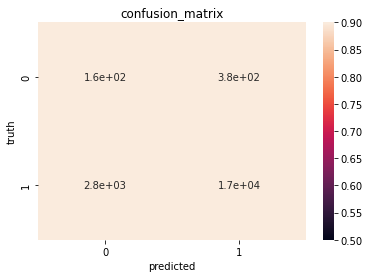

In [60]:
axis = plt.axes()
sns.heatmap(conf_mat, xticklabels=[0,1], yticklabels= [0,1],vmin=0.5 , vmax= 0.9 ,ax =axis, annot =True ) 
axis.set(title="confusion_matrix",xlabel="predicted" , ylabel= "truth")
plt.show()

In [61]:
from wordcloud import WordCloud

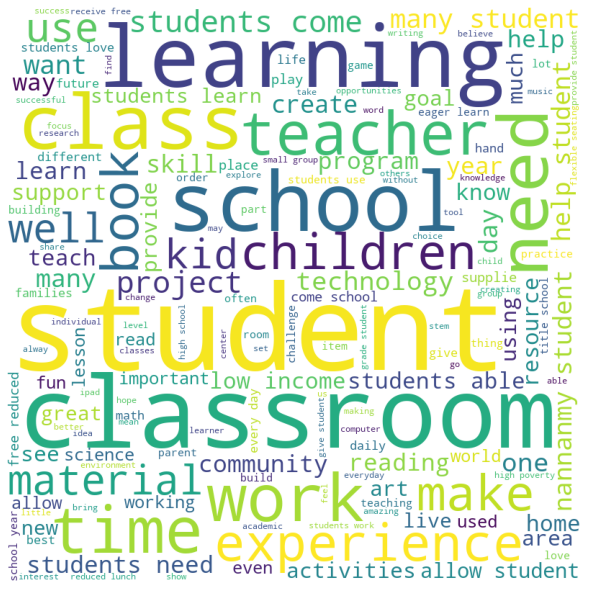

In [62]:

fp_xtest_pts=X_test.iloc[indices_for_false_positives]
comment_words = ""
for sentence in fp_xtest_pts["essay"]:
  comment_words += "".join(sentence)


wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

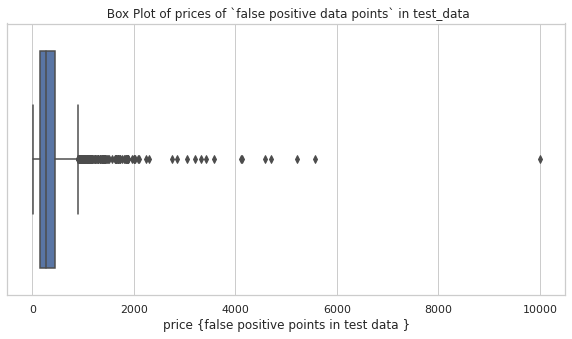

In [63]:
"""Plot the box plot with the `price` of these `false positive data points`
Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`"""
import seaborn as sns
plt.figure(figsize=(10,5))
sns.set_theme(style="whitegrid")

ax = sns.boxplot(fp_xtest_pts["price"].values)

#snsboxplot(fp_xtest_pts["price"].values)
plt.xlabel("price {false positive points in test data }")
plt.title(" Box Plot of prices of `false positive data points` in test_data")
plt.show()


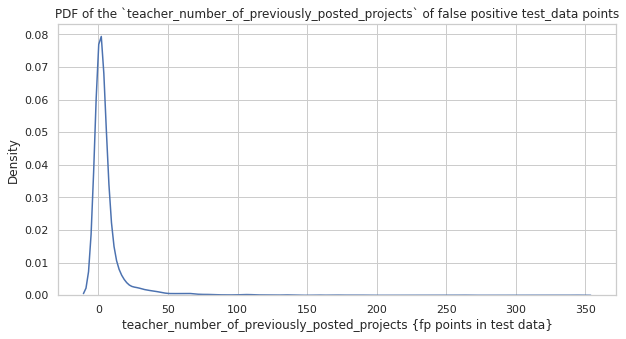

In [64]:
plt.figure(figsize=(10,5))
sns.set_theme(style="whitegrid")
ax = sns.kdeplot(fp_xtest_pts["teacher_number_of_previously_posted_projects"].values)
plt.xlabel("teacher_number_of_previously_posted_projects {fp points in test data}")
plt.title("PDF of the `teacher_number_of_previously_posted_projects` of false positive test_data points")
plt.show()

In [65]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [66]:
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [67]:
x1 = [1,3,10,30] #max_depth
y1 = [5,10,100,500] #min_samples_split
z1 = train_auc

x2 = [1,3,10,30]
y2 = [5,10,100,500]
z2 = cv_auc

In [68]:

trace1 = go.Scatter3d(x=x1,y=y1,z=z1, name = 'train')
trace2 = go.Scatter3d(x=x2,y=y2,z=z2, name = 'Cross validation')
data = [trace1, trace2]

layout = go.Layout(scene = dict(
        xaxis = dict(title='max_depth'),
        yaxis = dict(title='min_samples_split'),
        zaxis = dict(title='AUC'),))

fig = go.Figure(data=data, layout=layout)
offline.iplot(fig, filename='3d-scatter-colorscale')
#fig.show()
plt.show()


In [69]:
#using set2 parameters for hyperparam-tuning
train_auc_set2, cv_auc_set2 = cross_valid(train_data_set2, y_train.values, cv_data_set2, y_cv.values)

In [70]:
train_auc_matform_set2 = np.array(train_auc_set2).reshape(4,-1)
cv_auc_matform_set2 = np.array(cv_auc_set2).reshape(4,-1)

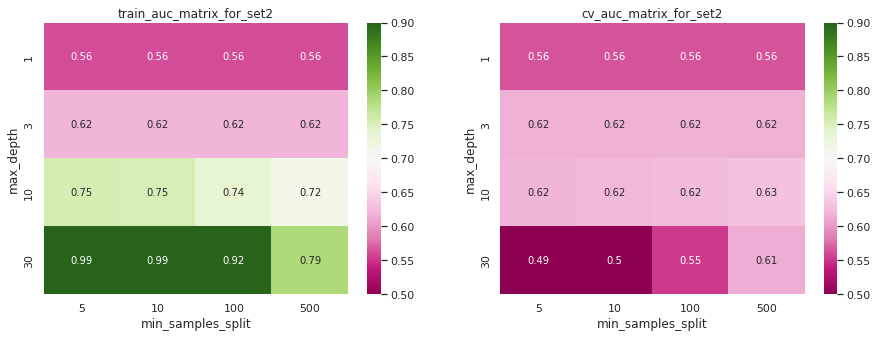

In [71]:
#BlockName: HMAPS
import seaborn as sns
fig, (ax1, ax2) = plt.subplots(nrows=1,ncols=2,figsize=(15,5))
sns.heatmap(train_auc_matform_set2 , xticklabels=[5,10,100,500], yticklabels= [1,3,10,30],vmin=0.5 , vmax= 0.9 ,ax =ax1, annot =True ,cmap="PiYG") #yaxis: max_depth, #x_axis: min_samples_split
sns.heatmap(cv_auc_matform_set2 , xticklabels=[5,10,100,500], yticklabels= [1,3,10,30] ,vmin=0.5, vmax=0.9 ,ax=ax2 ,annot =True , cmap="PiYG") #yaxis: max_depth, #x_axis: min_samples_split
ax1.set(title="train_auc_matrix_for_set2",xlabel="min_samples_split" , ylabel= "max_depth")
ax2.set(title="cv_auc_matrix_for_set2",xlabel="min_samples_split" , ylabel= "max_depth")
plt.show()

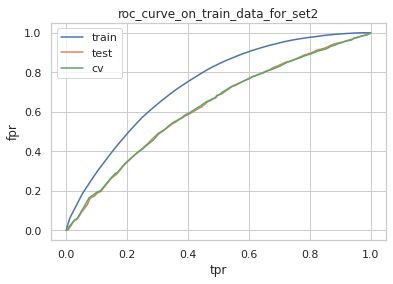

AUC of ROC on train data for set2: 0.7382934340995194
AUC of ROC on test data for set2: 0.6240335658855626


In [72]:
#with reasons similar to as stated above,I take max_depth= 10, min_samples_split = 100
#This time, for set2, I will also take max_depth= 30 and min_samples_split = 500
best_max_depth_set2= 10
best_min_samples_split_set2 = 100
tree_of_best_hyp_set2 = DecisionTreeClassifier(min_samples_split= best_min_samples_split_set2, max_depth= best_max_depth_set2 )
tree_of_best_hyp_set2.fit(train_data_set2, y_train.values)

prob_predictions_train_set2 = tree_of_best_hyp_set2.predict_proba(train_data_set2)
roc_auc_on_train_set2 = roc_auc_score(y_train.values , prob_predictions_train_set2 [:,1])
fpr_train_set2, tpr_train_set2, _ = roc_curve(y_train.values , prob_predictions_train_set2 [:,1])

prob_predictions_test_set2 = tree_of_best_hyp_set2.predict_proba(test_data_set2)
roc_auc_on_test_set2 = roc_auc_score(y_test.values , prob_predictions_test_set2 [:,1])
fpr_test_set2, tpr_test_set2, _ = roc_curve(y_test.values , prob_predictions_test_set2 [:,1])
predictions_test_set2= tree_of_best_hyp_set2.predict(test_data_set2)

prob_predictions_cv_set2 = tree_of_best_hyp_set2.predict_proba(cv_data_set2)
roc_auc_on_cv_set2 = roc_auc_score(y_cv.values , prob_predictions_cv_set2 [:,1])
fpr_cv_set2, tpr_cv_set2, _ = roc_curve(y_cv.values , prob_predictions_cv_set2 [:,1])
predictions_cv_set2= tree_of_best_hyp_set2.predict(cv_data_set2)

plt.plot(fpr_train_set2, tpr_train_set2 ,label="train")
plt.plot(fpr_test_set2, tpr_test_set2, label="test")
plt.plot(fpr_cv_set2, tpr_cv_set2, label="cv")
plt.xlabel("tpr")
plt.ylabel("fpr")
plt.title("roc_curves_for_set2")
plt.legend()
plt.show()
print("AUC of ROC on train data for set2:",roc_auc_on_train_set2)
print("AUC of ROC on test data for set2:",roc_auc_on_test_set2)

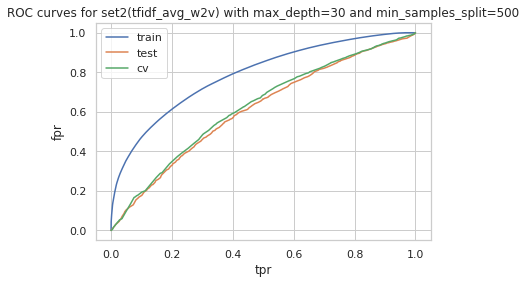

AUC of ROC on train data for set2 with max_depth=30 and min_samples_split=500: 0.7865041453290709
AUC of ROC on test data for set2 with max_depth=30 and min_samples_split=500: 0.610804174048476


In [73]:
best_max_depth_set2_b= 30
best_min_samples_split_set2_b = 500
tree_of_best_hyp_set2_b  = DecisionTreeClassifier(min_samples_split= best_min_samples_split_set2_b , max_depth= best_max_depth_set2_b )
tree_of_best_hyp_set2_b.fit(train_data_set2, y_train.values)

prob_predictions_train_set2_b  = tree_of_best_hyp_set2_b.predict_proba(train_data_set2)
roc_auc_on_train_set2_b = roc_auc_score(y_train.values , prob_predictions_train_set2_b [:,1])
fpr_train_set2_b, tpr_train_set2_b, _ = roc_curve(y_train.values , prob_predictions_train_set2_b [:,1])

prob_predictions_test_set2_b = tree_of_best_hyp_set2_b.predict_proba(test_data_set2)
roc_auc_on_test_set2_b = roc_auc_score(y_test.values , prob_predictions_test_set2_b [:,1])
fpr_test_set2_b, tpr_test_set2_b, _ = roc_curve(y_test.values , prob_predictions_test_set2_b [:,1])
predictions_test_set2_b= tree_of_best_hyp_set2_b.predict(test_data_set2)

prob_predictions_cv_set2_b = tree_of_best_hyp_set2_b.predict_proba(cv_data_set2)
roc_auc_on_cv_set2_b = roc_auc_score(y_cv.values , prob_predictions_cv_set2 [:,1])
fpr_cv_set2_b, tpr_cv_set2_b, _ = roc_curve(y_cv.values , prob_predictions_cv_set2 [:,1])
predictions_cv_set2_b= tree_of_best_hyp_set2_b.predict(cv_data_set2)

plt.plot(fpr_train_set2_b, tpr_train_set2_b ,label="train")
plt.plot(fpr_test_set2_b, tpr_test_set2_b, label="test")
plt.plot(fpr_cv_set2_b, tpr_cv_set2_b, label="cv")
plt.xlabel("tpr")
plt.ylabel("fpr")
plt.title("ROC curves for set2(tfidf_avg_w2v) with max_depth=30 and min_samples_split=500")
plt.legend()
plt.show()
print("AUC of ROC on train data for set2 with max_depth=30 and min_samples_split=500:",roc_auc_on_train_set2_b)
print("AUC of ROC on test data for set2 with max_depth=30 and min_samples_split=500:",roc_auc_on_test_set2_b)

# <font color='red'> <b>Task - 2</b></font>

In [74]:
# 1. write your code in following steps for task 2
# 2. select all non zero features
# 3. Update your dataset i.e. X_train,X_test and X_cv so that it contains all rows and only non zero features
# 4. perform hyperparameter tuning and plot either heatmap or 3d plot.
# 5. Fit the best model. Plot ROC AUC curve and confusion matrix similar to model 1.


In [75]:
"""Select all the features which are having non-zero feature importance.You can get the feature importance using 
'feature_importances_` (https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html),
 discard the all other remaining features and then apply any of the model of you choice i.e. 
 (Dession tree, Logistic Regression, Linear SVM).
You need to do hyperparameter tuning corresponding to the model you selected and procedure in step 2 and step 3
Note: when you want to find the feature importance make sure you don't use max_depth parameter keep it None."""

"""You need to summarize the results at the end of the notebook, summarize it in the table format"""

'You need to summarize the results at the end of the notebook, summarize it in the table format'

In [76]:
# Tabulate your results

In [78]:
mask = tree_of_best_hyp.feature_importances_ != 0
imp_features=[i for i,v in enumerate(tree_of_best_hyp.feature_importances_) if v!=0 ]

In [79]:
mask2 = tree_of_best_hyp_set2.feature_importances_ != 0
imp_features2=[i for i,v in enumerate(tree_of_best_hyp_set2.feature_importances_) if v!=0 ]

In [80]:
from sklearn.preprocessing import StandardScaler

In [81]:
train_data_set1_imp_feat= train_data_set1.tocsr()[:,imp_features]
cv_data_set1_imp_feat = cv_data_set1.tocsr()[:,imp_features]
test_data_set1_imp_feat = test_data_set1.tocsr()[:,imp_features]

train_data_set1_imp_feat_scalar = StandardScaler()
train_data_set1_imp_feat_scalar = train_data_set1_imp_feat_scalar.fit(train_data_set1_imp_feat.toarray())

train_data_set1_imp_feat_standard = train_data_set1_imp_feat_scalar.transform(train_data_set1_imp_feat.toarray())
cv_data_set1_imp_feat_standard = train_data_set1_imp_feat_scalar.transform(cv_data_set1_imp_feat.toarray())
test_data_set1_imp_feat_standard = train_data_set1_imp_feat_scalar.transform(test_data_set1_imp_feat.toarray())

In [82]:
train_data_set2_imp_feat= train_data_set2.tocsr()[:,imp_features2]
cv_data_set2_imp_feat = cv_data_set2.tocsr()[:,imp_features2]
test_data_set2_imp_feat = test_data_set2.tocsr()[:,imp_features2]

train_data_set2_imp_feat_scalar = StandardScaler()
train_data_set2_imp_feat_scalar = train_data_set2_imp_feat_scalar.fit(train_data_set2_imp_feat.toarray())

train_data_set2_imp_feat_standard = train_data_set2_imp_feat_scalar.transform(train_data_set2_imp_feat.toarray())
cv_data_set2_imp_feat_standard = train_data_set2_imp_feat_scalar.transform(cv_data_set2_imp_feat.toarray())
test_data_set2_imp_feat_standard = train_data_set2_imp_feat_scalar.transform(test_data_set2_imp_feat.toarray())

In [83]:
from sklearn.linear_model import LogisticRegression
def log_reg(train_data_imp_feat, y_train, cv_data_imp_feat, y_cv):
  Creg = [0.001, 0.01, 0.1, 1, 10, 100,1000]
  auc_train_imp =[]
  auc_cv_imp =[]

  acc_train_imp =[]
  acc_cv_imp =[]

  for c in [0.001, 0.01, 0.1, 1, 10, 100,1000]:
    linear_model = LogisticRegression(C= c)
    linear_model.fit(train_data_imp_feat , y_train.values)
    predict_train_prob = linear_model.predict_proba(train_data_imp_feat)[:,1]
    predict_cv_prob = linear_model.predict_proba(cv_data_imp_feat)[:,1]

    predict_train_imp = linear_model.predict(train_data_imp_feat)
    predict_cv_imp = linear_model.predict(cv_data_imp_feat)

    roc_auc_train_imp = roc_auc_score(y_train.values, predict_train_prob)
    roc_auc_cv_imp = roc_auc_score(y_cv.values, predict_cv_prob)

    accuracy_train_imp = (1-np.abs(y_train.values - predict_train_imp).mean())
    accuracy_cv_imp = (1-np.abs(y_cv.values - predict_cv_imp).mean())
    #print(roc_auc_train)
    #print(roc_auc_cv)
    auc_train_imp.append(roc_auc_train_imp)
    auc_cv_imp.append(roc_auc_cv_imp)

    acc_train_imp.append(accuracy_train_imp)
    acc_cv_imp.append(accuracy_cv_imp)

  plt.plot(Creg,acc_train_imp , label = "accuracy on train")
  plt.plot(Creg,acc_cv_imp, label = "accuracy on cv")
  plt.xlabel("regularizer C")
  plt.ylabel("accuracies")
  plt.title("accuracies vs hyperparameter(C)")
  plt.legend()
  plt.show()

  return roc_auc_train_imp ,roc_auc_cv_imp ,acc_train_imp,acc_cv_imp

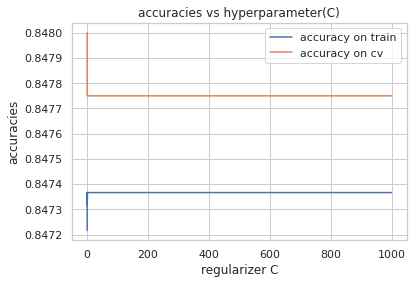

In [84]:
roc_auc_train_imp_set1 ,roc_auc_cv_imp_set1 ,acc_train_imp_set1,acc_cv_imp_set1 =log_reg(train_data_set1_imp_feat_standard , y_train, cv_data_set1_imp_feat_standard, y_cv )

In [86]:
print(acc_cv_imp_set1)
print(acc_train_imp_set1)
#Taking C= 0.1
C_best = 0.1
linear_model1 = LogisticRegression(C= C_best)
linear_model1.fit(train_data_set1_imp_feat_standard , y_train.values)
predict_train_prob1 = linear_model1.predict_proba(train_data_set1_imp_feat_standard )[:,1]
predict_cv_prob1 = linear_model1.predict_proba(cv_data_set1_imp_feat_standard )[:,1]

predict_train_imp1 = linear_model1.predict(train_data_set1_imp_feat_standard )
predict_cv_imp1 = linear_model1.predict(cv_data_set1_imp_feat_standard )

roc_auc_train_imp1= roc_auc_score(y_train.values, predict_train_prob1)
roc_auc_cv_imp1 = roc_auc_score(y_cv.values, predict_cv_prob1)

accuracy_train_imp1 = (1-np.abs(y_train.values - predict_train_imp1).mean())
accuracy_cv_imp1 = (1-np.abs(y_cv.values - predict_cv_imp1).mean())

print("best C parameter for log-regression model is: 0.1")
print(roc_auc_cv_imp1) 
print(roc_auc_train_imp1)
print(accuracy_train_imp1)
print(accuracy_cv_imp1)

[0.848, 0.84785, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775]
[0.8472166666666667, 0.8473666666666666, 0.8473166666666667, 0.8473666666666666, 0.8473666666666666, 0.8473666666666666, 0.8473666666666666]
best C parameter for log-regression model is: 0.1
0.6765544904519916
0.6889094427257829
0.8473166666666667
0.84775


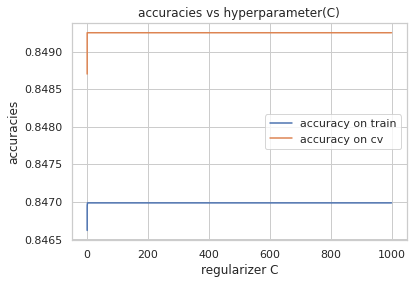

In [87]:
roc_auc_train_imp_set2 ,roc_auc_cv_imp_set2 ,acc_train_imp_set2,acc_cv_imp_set2 = log_reg(train_data_set2_imp_feat_standard , y_train, cv_data_set2_imp_feat_standard, y_cv )

In [88]:
print(acc_cv_imp_set2)
print(acc_train_imp_set2)
#Taking C= 0.1
C_best2 = 0.1
linear_model2 = LogisticRegression(C= C_best2)
linear_model2.fit(train_data_set2_imp_feat_standard , y_train.values)
predict_train_prob2 = linear_model2.predict_proba(train_data_set2_imp_feat_standard )[:,1]
predict_cv_prob2 = linear_model2.predict_proba(cv_data_set2_imp_feat_standard )[:,1]

predict_train_imp2 = linear_model2.predict(train_data_set2_imp_feat_standard )
predict_cv_imp2 = linear_model2.predict(cv_data_set2_imp_feat_standard )

predict_test_prob2 = linear_model2.predict_proba(test_data_set2_imp_feat_standard )[:,1]
predict_test_imp2 = linear_model2.predict(test_data_set2_imp_feat_standard )
roc_auc_test_imp2 = roc_auc_score(y_test.values, predict_test_prob2)


roc_auc_train_imp2= roc_auc_score(y_train.values, predict_train_prob2)
roc_auc_cv_imp2 = roc_auc_score(y_cv.values, predict_cv_prob2)

accuracy_train_imp2 = (1-np.abs(y_train.values - predict_train_imp2).mean())
accuracy_cv_imp2 = (1-np.abs(y_cv.values - predict_cv_imp2).mean())

print("best C parameter for log-regression model is: 0.1")
print(roc_auc_cv_imp2) 
print(roc_auc_train_imp2)
print(accuracy_train_imp2)
print(accuracy_cv_imp2)


[0.8487, 0.8492500000000001, 0.8492500000000001, 0.8492500000000001, 0.8492500000000001, 0.8492500000000001, 0.8492500000000001]
[0.8466166666666667, 0.8469166666666667, 0.84695, 0.8469833333333333, 0.8469833333333333, 0.8469833333333333, 0.8469833333333333]
best C parameter for log-regression model is: 0.1
0.6968534844056002
0.7097357016278114
0.84695
0.8492500000000001


In [89]:
train_imp_accuracy, cv_imp_accuracy = cross_valid(train_data_set1_imp_feat, y_train.values, cv_data_set1_imp_feat, y_cv.values)

In [90]:
train_imp_auc_matform = np.array(train_imp_accuracy).reshape(4,-1)
cv_imp_auc_matform = np.array(cv_imp_accuracy ).reshape(4,-1)

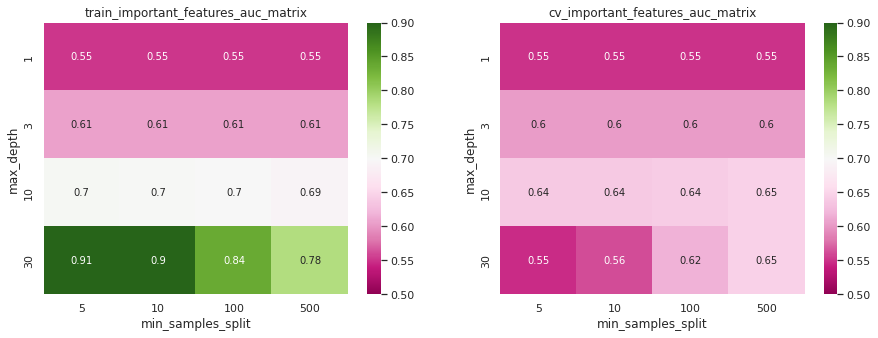

In [91]:
#BlockName: HMAPS
import seaborn as sns
fig, (ax1, ax2) = plt.subplots(nrows=1,ncols=2,figsize=(15,5))
sns.heatmap(train_imp_auc_matform , xticklabels=[5,10,100,500], yticklabels= [1,3,10,30],vmin=0.5 , vmax= 0.9 ,ax =ax1, annot =True ,cmap="PiYG") #yaxis: max_depth, #x_axis: min_samples_split
sns.heatmap(cv_imp_auc_matform , xticklabels=[5,10,100,500], yticklabels= [1,3,10,30] ,vmin=0.5, vmax=0.9 ,ax=ax2 ,annot =True , cmap="PiYG") #yaxis: max_depth, #x_axis: min_samples_split
ax1.set(title="train_important_features_auc_matrix",xlabel="min_samples_split" , ylabel= "max_depth")
ax2.set(title="cv_important_features_auc_matrix",xlabel="min_samples_split" , ylabel= "max_depth")
plt.show()

In [92]:
tree_for_imp_feat = DecisionTreeClassifier(min_samples_split=100, max_depth=10)
tree_for_imp_feat.fit(train_data_set1_imp_feat , y_train.values)
train_imp_predict_probabilities= tree_for_imp_feat.predict_proba(train_data_set1_imp_feat)[:,1]
test_imp_predict_probabilities = tree_for_imp_feat.predict_proba(test_data_set1_imp_feat)[:,1]
#cv_imp_predict_probabilities = tree_for_imp_feat.predict_proba(cv_data_set1_imp_feat)[:,1]
roc_auc_on_train_imp = roc_auc_score(y_train.values , train_imp_predict_probabilities)
fpr_train_imp, tpr_train_imp, _ = roc_curve(y_train.values ,train_imp_predict_probabilities)

roc_auc_on_test_imp = roc_auc_score(y_test.values , test_imp_predict_probabilities)
fpr_test_imp, tpr_test_imp, _ = roc_curve(y_test.values ,test_imp_predict_probabilities)



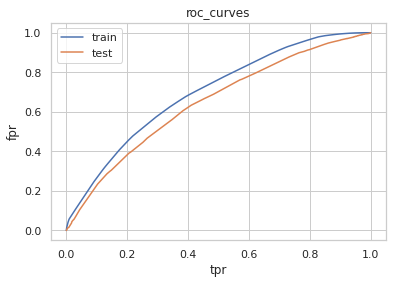

AUC on train data is  0.6986667473717455
AUC on test data is  0.6466293544361833


In [93]:
plt.plot(fpr_train_imp, tpr_train_imp,label="train")
plt.plot(fpr_test_imp, tpr_test_imp, label="test")
#plt.plot(fpr_cv, tpr_cv, label="cv")
plt.xlabel("tpr")
plt.ylabel("fpr")
plt.title("roc_curves on set1 important features only")
plt.legend()
plt.show()
print( "AUC on train data is ",roc_auc_on_train_imp)
print( "AUC on test data is ",roc_auc_on_test_imp)

In [ ]:
"""
Set 1: categorical, numerical features + preprocessed_essay (TFIDF) + Sentiment scores(preprocessed_essay)
Set 2: categorical, numerical features + preprocessed_essay (TFIDF W2V) + Sentiment scores(preprocessed_essay)
"""

In [100]:
print ("Models with specifically processed data          -  AUC")
print ("--------------------------------------------------- -----------------------------------------------------")
print ("Decision Tree on set1-                                        Train: ",roc_auc_on_train,"      Test: ",roc_auc_on_test)
print ("Decision Tree on set2-                                        Train: ",roc_auc_on_train_set2,"      Test: ",roc_auc_on_test_set2)
print ("Logistic Regression on set2 (no un-important features) -      Train: ",roc_auc_train_imp2,"      Test: ",roc_auc_test_imp2)
print ("Decision Tree on set1 (no un-important features)              Train: ",roc_auc_on_train_imp,"     Test: ",roc_auc_on_test_imp)

Models with specifically processed data          -  AUC
--------------------------------------------------- -----------------------------------------------------
Decision Tree on set1-                                        Train:  0.6986667473717455       Test:  0.6458723503372059
Decision Tree on set2-                                        Train:  0.7382934340995194       Test:  0.6240335658855626
Logistic Regression on set2 (no un-important features) -      Train:  0.7097357016278114       Test:  0.6999827840253807
Decision Tree on set1 (no un-important features)              Train:  0.6986667473717455      Test:  0.6466293544361833
